In [1]:
import argparse
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import pickle as pkl
import seaborn as sns
import pandas as pd

import torch
import torch.nn.functional as F
import torch.nn as nn

weather = pd.read_csv('data1/jfk_weather_cleaned_1.csv')

weather =weather[:80000]
weather = weather.astype(float)
weather.info()

weather1 = pd.read_csv('data1/generatedata.csv')
weather1 =weather1[:80000]
weather1.info()



Bad key "text.kerning_factor" on line 4 in
c:\anaconda3\envs\pytorch\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DewPointTempF     80000 non-null  float64
 1   DRYBULBTEMPF      80000 non-null  float64
 2   RelativeHumidity  80000 non-null  float64
 3   StationPressure   80000 non-null  float64
 4   VISIBILITY        80000 non-null  float64
 5   WETBULBTEMPF      80000 non-null  float64
 6   WindDirection     80000 non-null  float64
 7   WindSpeed         80000 non-null  float64
dtypes: float64(8)
memory usage: 4.9 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DewPointTempF     80000 non-null  float64
 1   DRYBULBTEMPF      80000 non-null  float64
 2   RelativeHumidity  80000 non-null  float64
 3   StationPressure   80000 non-null  

In [15]:
k=0
for i in range(80000):
    k=k+weather1.loc[i,'DRYBULBTEMPF']
print((k/80000))
# weather1=weather1*287.2503076131042
# np.savetxt('data/fake_weather_with_noise07.csv',fake_weather_with_noise,delimiter=',')

55.09626000000087


In [4]:
#fake_noise_weather2
k=0
for i in range(75000):
    k=k+weather1.loc[i,'VISIBILITY']
print((k/75000))


k=0
for i in range(75000):
    k=k+weather1.loc[i,'DRYBULBTEMPF']
print((k/75000))

k=0
for i in range(75000):
    k=k+weather1.loc[i,'WETBULBTEMPF']
print((k/75000))

k=0
for i in range(75000):
    k=k+weather1.loc[i,'StationPressure']
print((k/75000))

k=0
for i in range(75000):
    k=k+weather1.loc[i,'WindDirection']
print((k/75000))

k=0
for i in range(75000):
    k=k+weather1.loc[i,'DewPointTempF']
print((k/75000))

k=0
for i in range(75000):
    k=k+weather1.loc[i,'RelativeHumidity']
print((k/75000))

k=0
for i in range(75000):
    k=k+weather1.loc[i,'WindSpeed']
print((k/75000))

# fake_weather_with_DP_without_CLIP=fake_weather_with_DP_without_CLIP*209.28013497630275
# np.savetxt('data/fake_weather_with_DP_without_CLIP2.csv',fake_weather_with_DP_without_CLIP,delimiter=',')

7.0298263703999835
55.144844799996186
50.584896533328646
29.41571200000029
194.57291921319995
39.01498771226631
73.88005413334058
9.281585706839884


In [22]:
np.std(weather['WindSpeed'])
# np.std(fake_weather_with_DP_without_CLIP['VISIBILITY'])

6.07732524013443

In [4]:
k=0
for i in range(80000):
    k=k+weather.loc[i,'DRYBULBTEMPF']
print(k/75000)

58.76982666666667


In [5]:
def js_div(p_output, q_output, get_softmax=True):
    """
    Function that measures JS divergence between target and output logits:
    """
    KLDivLoss = nn.KLDivLoss(reduction='batchmean')
    if get_softmax:
        p_output = F.softmax(p_output)
        q_output = F.softmax(q_output)
    log_mean_output = ((p_output + q_output )/2).log()
    return (KLDivLoss(log_mean_output, p_output) + KLDivLoss(log_mean_output, q_output))/2
 
x = weather.values
y = weather1.values

x = torch.from_numpy(x)
y = torch.from_numpy(y)

print(js_div(x,x),"x-x")
print(js_div(x,y),"x-x")

tensor(0., dtype=torch.float64) x-x
tensor(0.2289, dtype=torch.float64) x-x


c:\anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  import sys
c:\anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


c:\anaconda3\envs\pytorch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\anaconda3\envs\pytorch\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\anaconda3\envs\pytorch\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\anaconda3\envs\pytorch\lib\site-packages\matplotlib\axes\_base.py:278: FutureWa

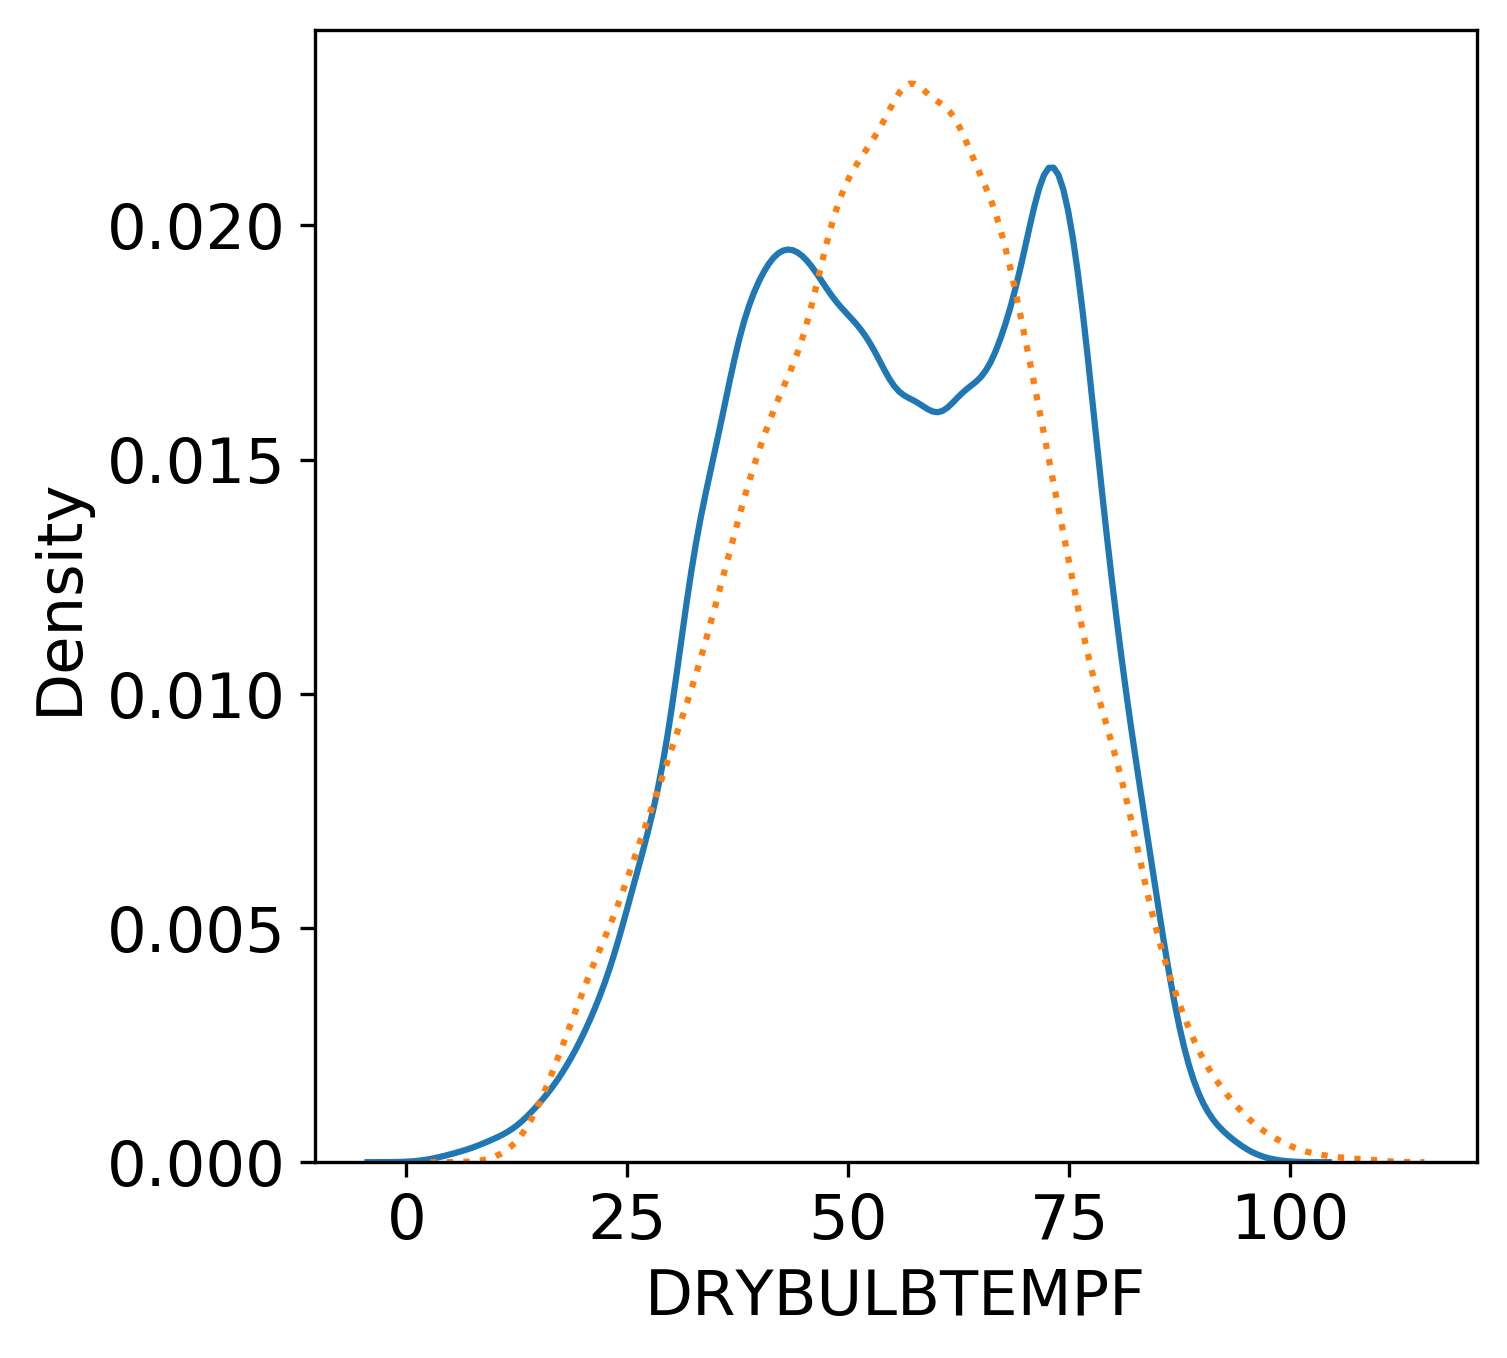

c:\anaconda3\envs\pytorch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\anaconda3\envs\pytorch\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\anaconda3\envs\pytorch\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\anaconda3\envs\pytorch\lib\site-packages\matplotlib\axes\_base.py:278: FutureWa

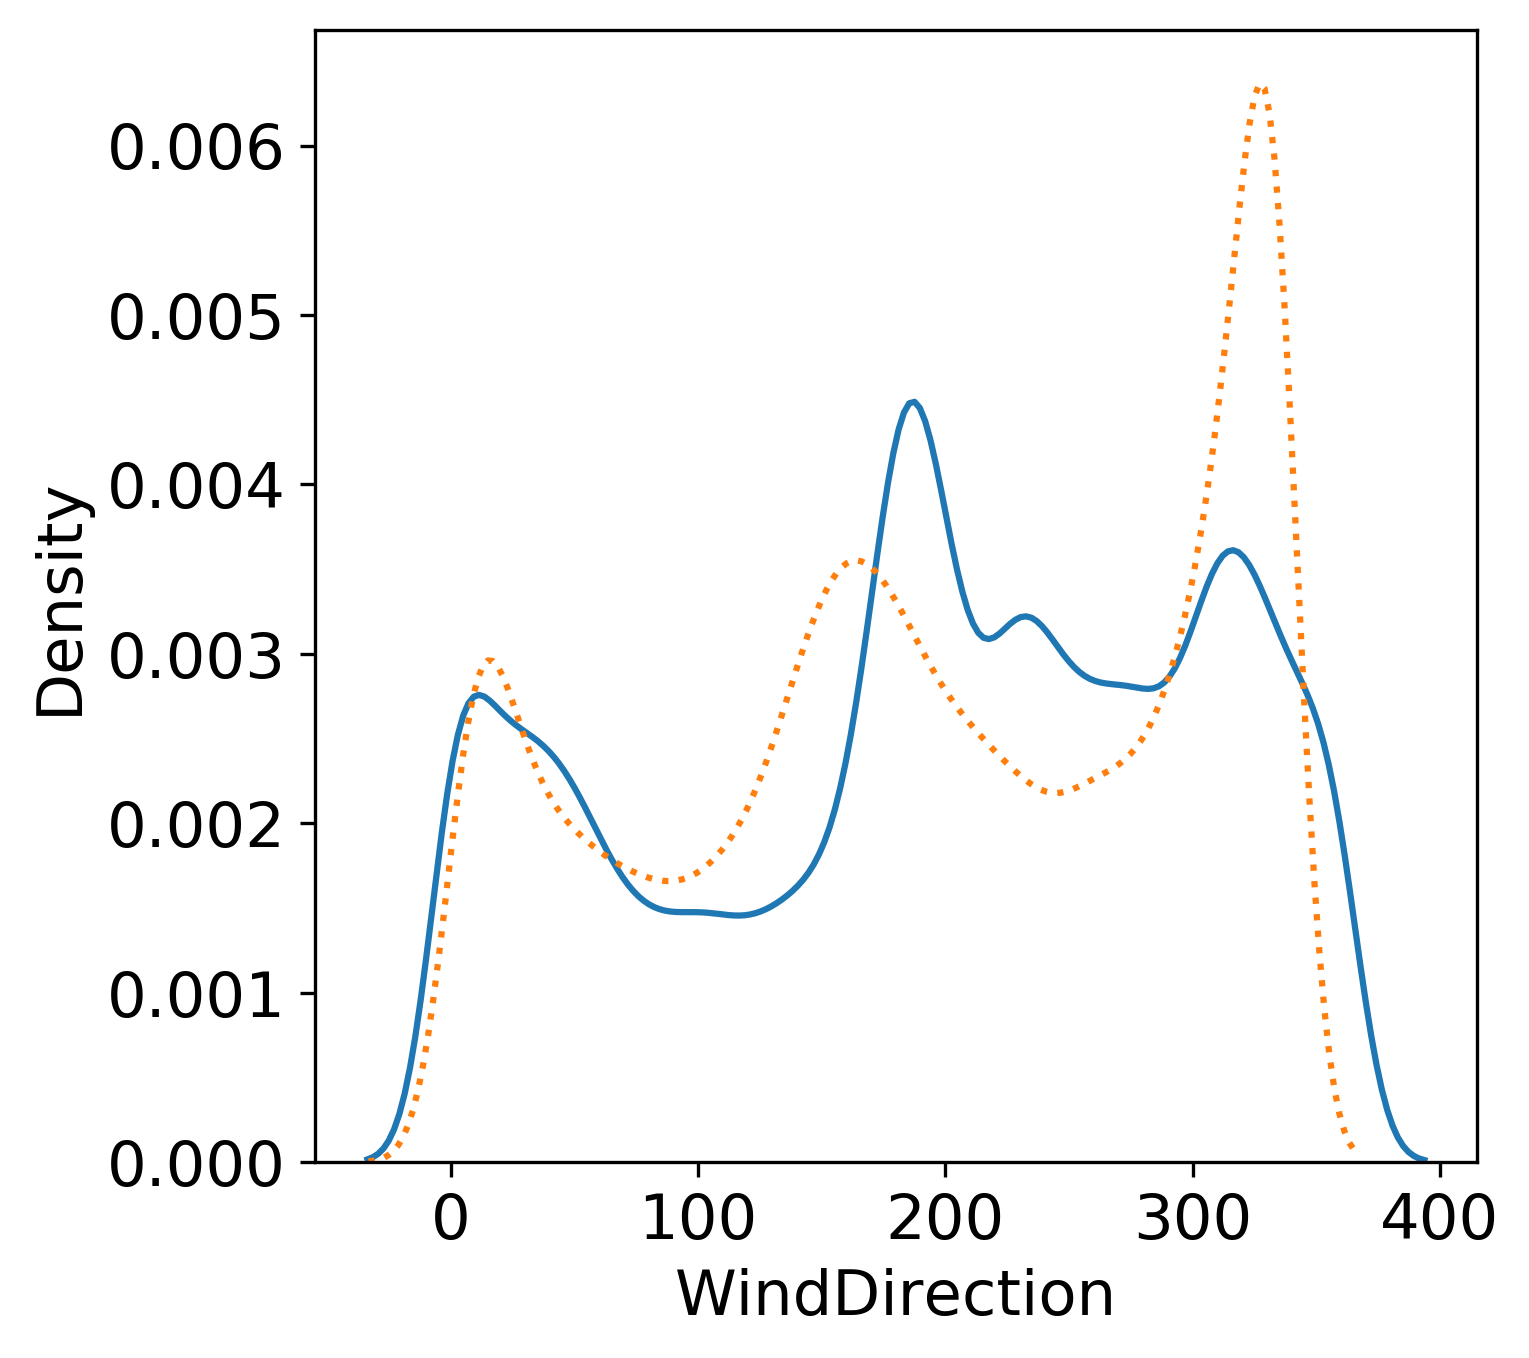

c:\anaconda3\envs\pytorch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\anaconda3\envs\pytorch\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\anaconda3\envs\pytorch\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\anaconda3\envs\pytorch\lib\site-packages\matplotlib\axes\_base.py:278: FutureWa

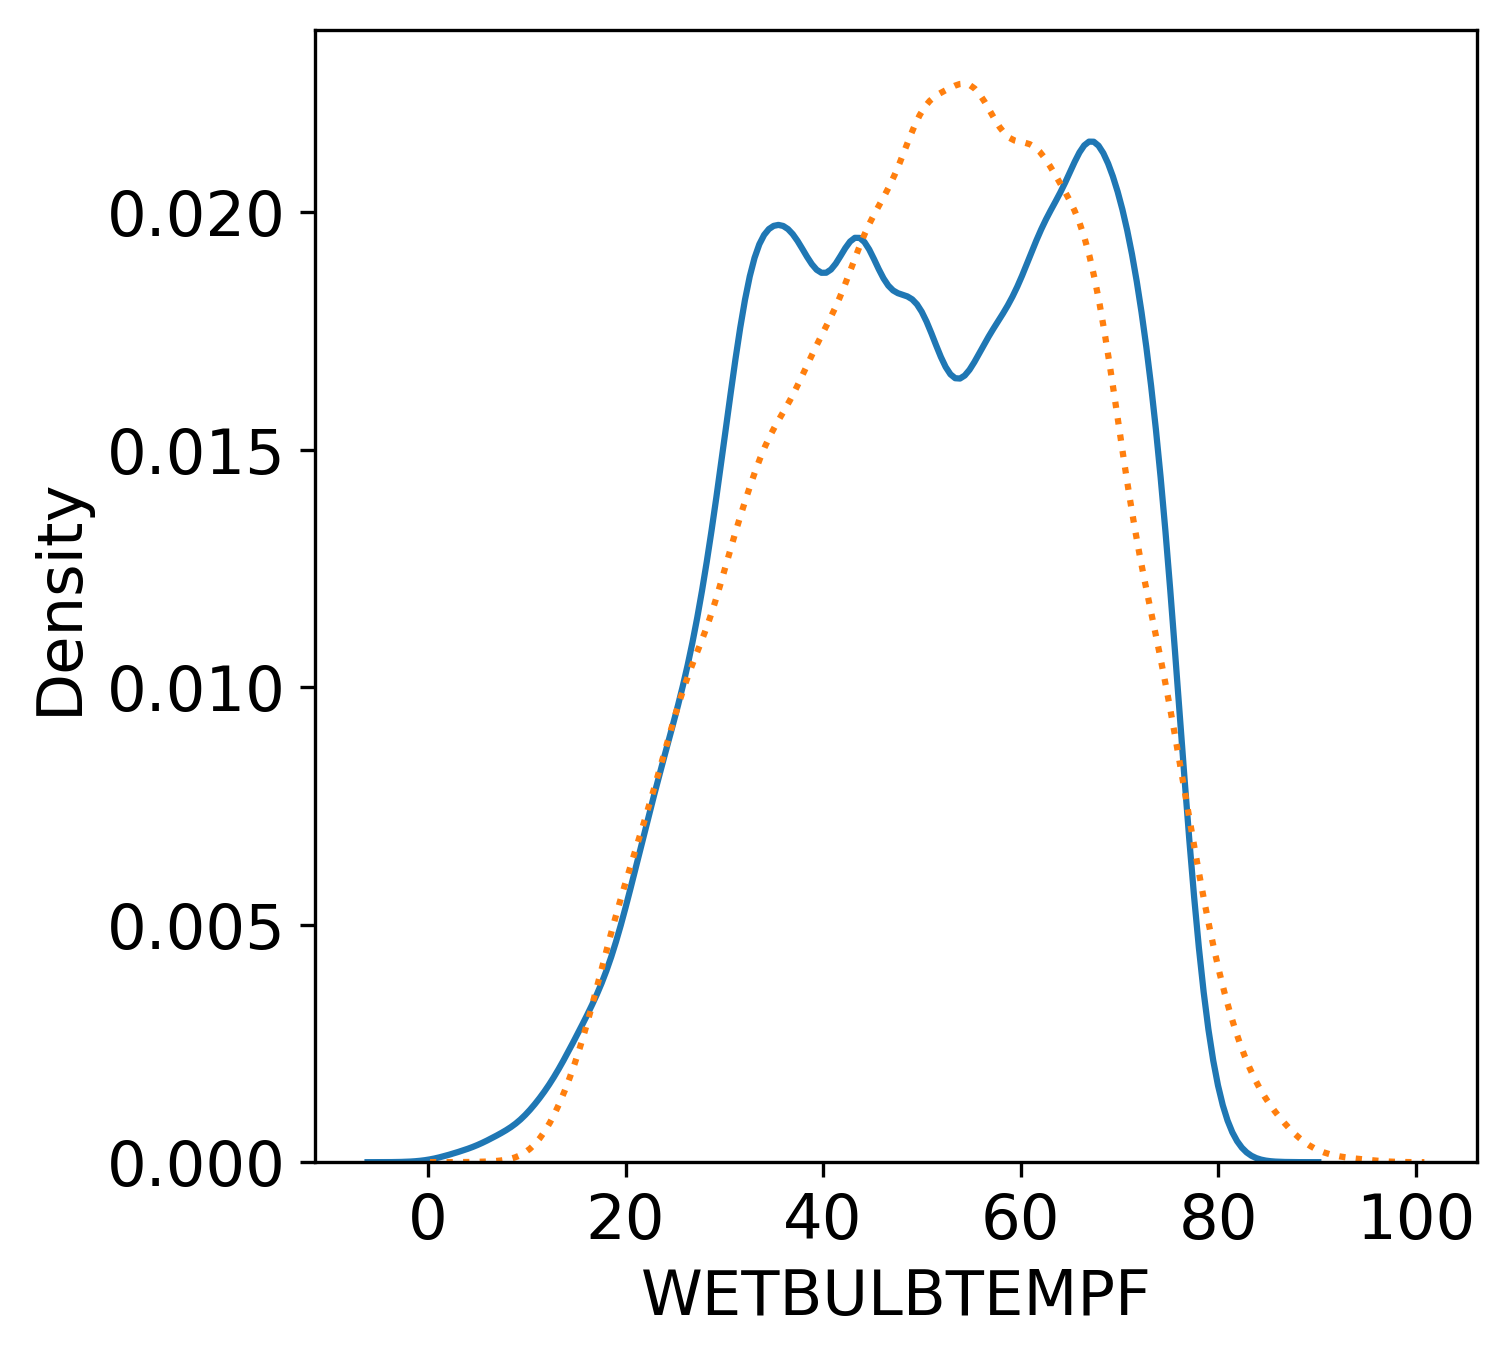

c:\anaconda3\envs\pytorch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\anaconda3\envs\pytorch\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\anaconda3\envs\pytorch\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\anaconda3\envs\pytorch\lib\site-packages\matplotlib\axes\_base.py:278: FutureWa

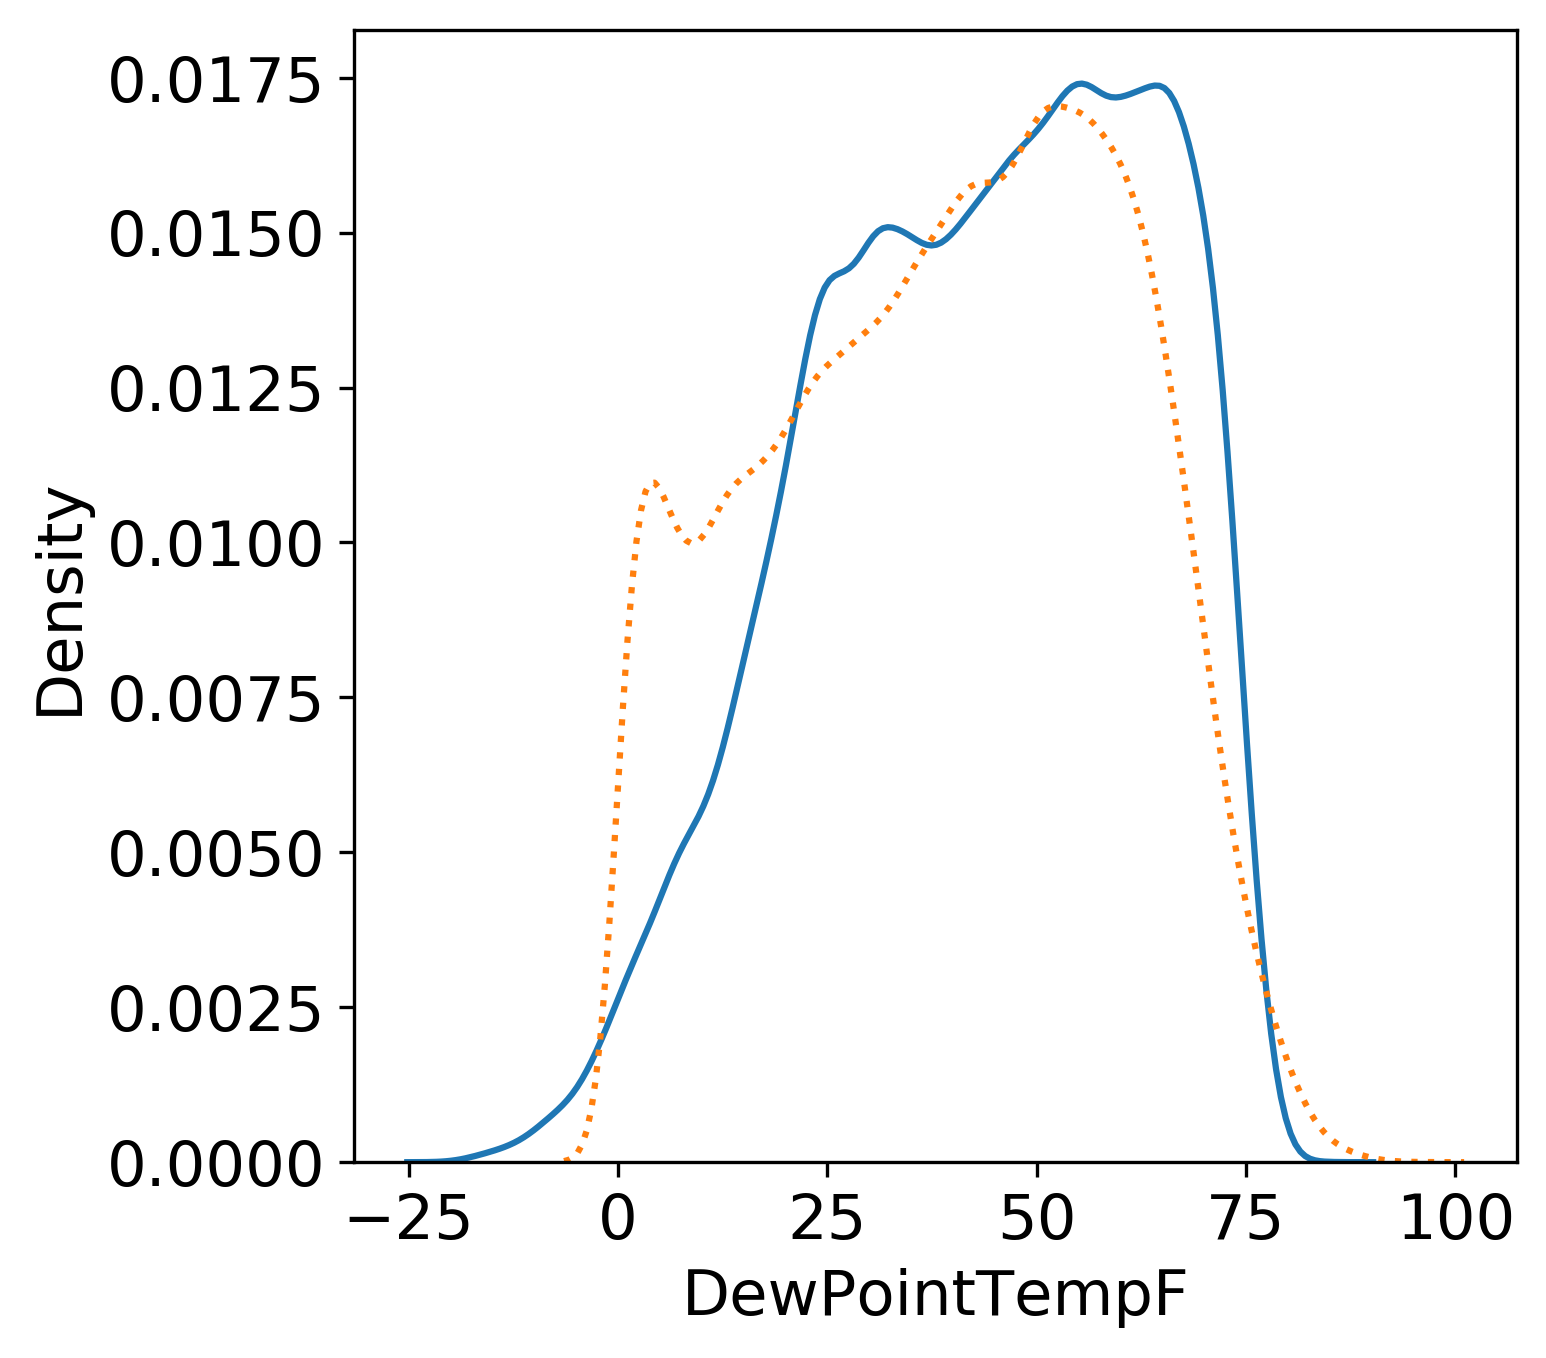

c:\anaconda3\envs\pytorch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\anaconda3\envs\pytorch\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\anaconda3\envs\pytorch\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\anaconda3\envs\pytorch\lib\site-packages\matplotlib\axes\_base.py:278: FutureWa

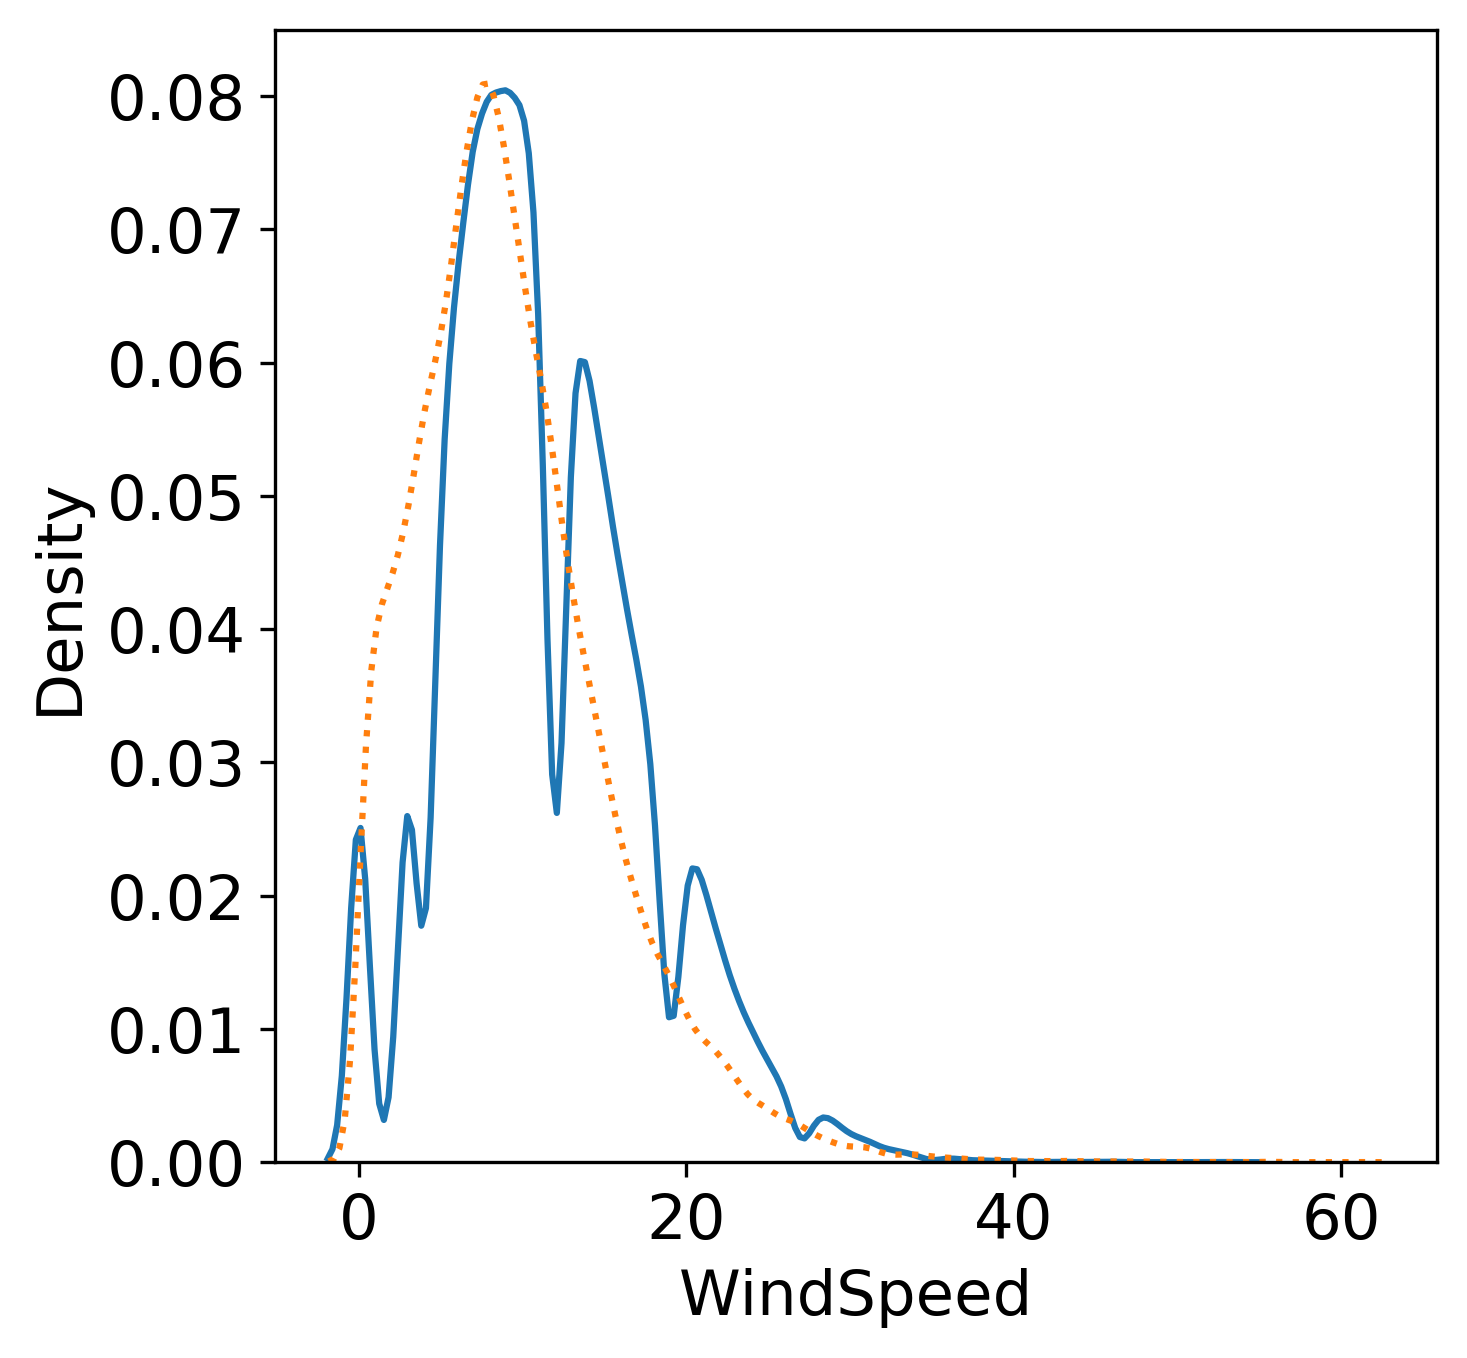

c:\anaconda3\envs\pytorch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\anaconda3\envs\pytorch\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\anaconda3\envs\pytorch\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\anaconda3\envs\pytorch\lib\site-packages\matplotlib\axes\_base.py:278: FutureWa

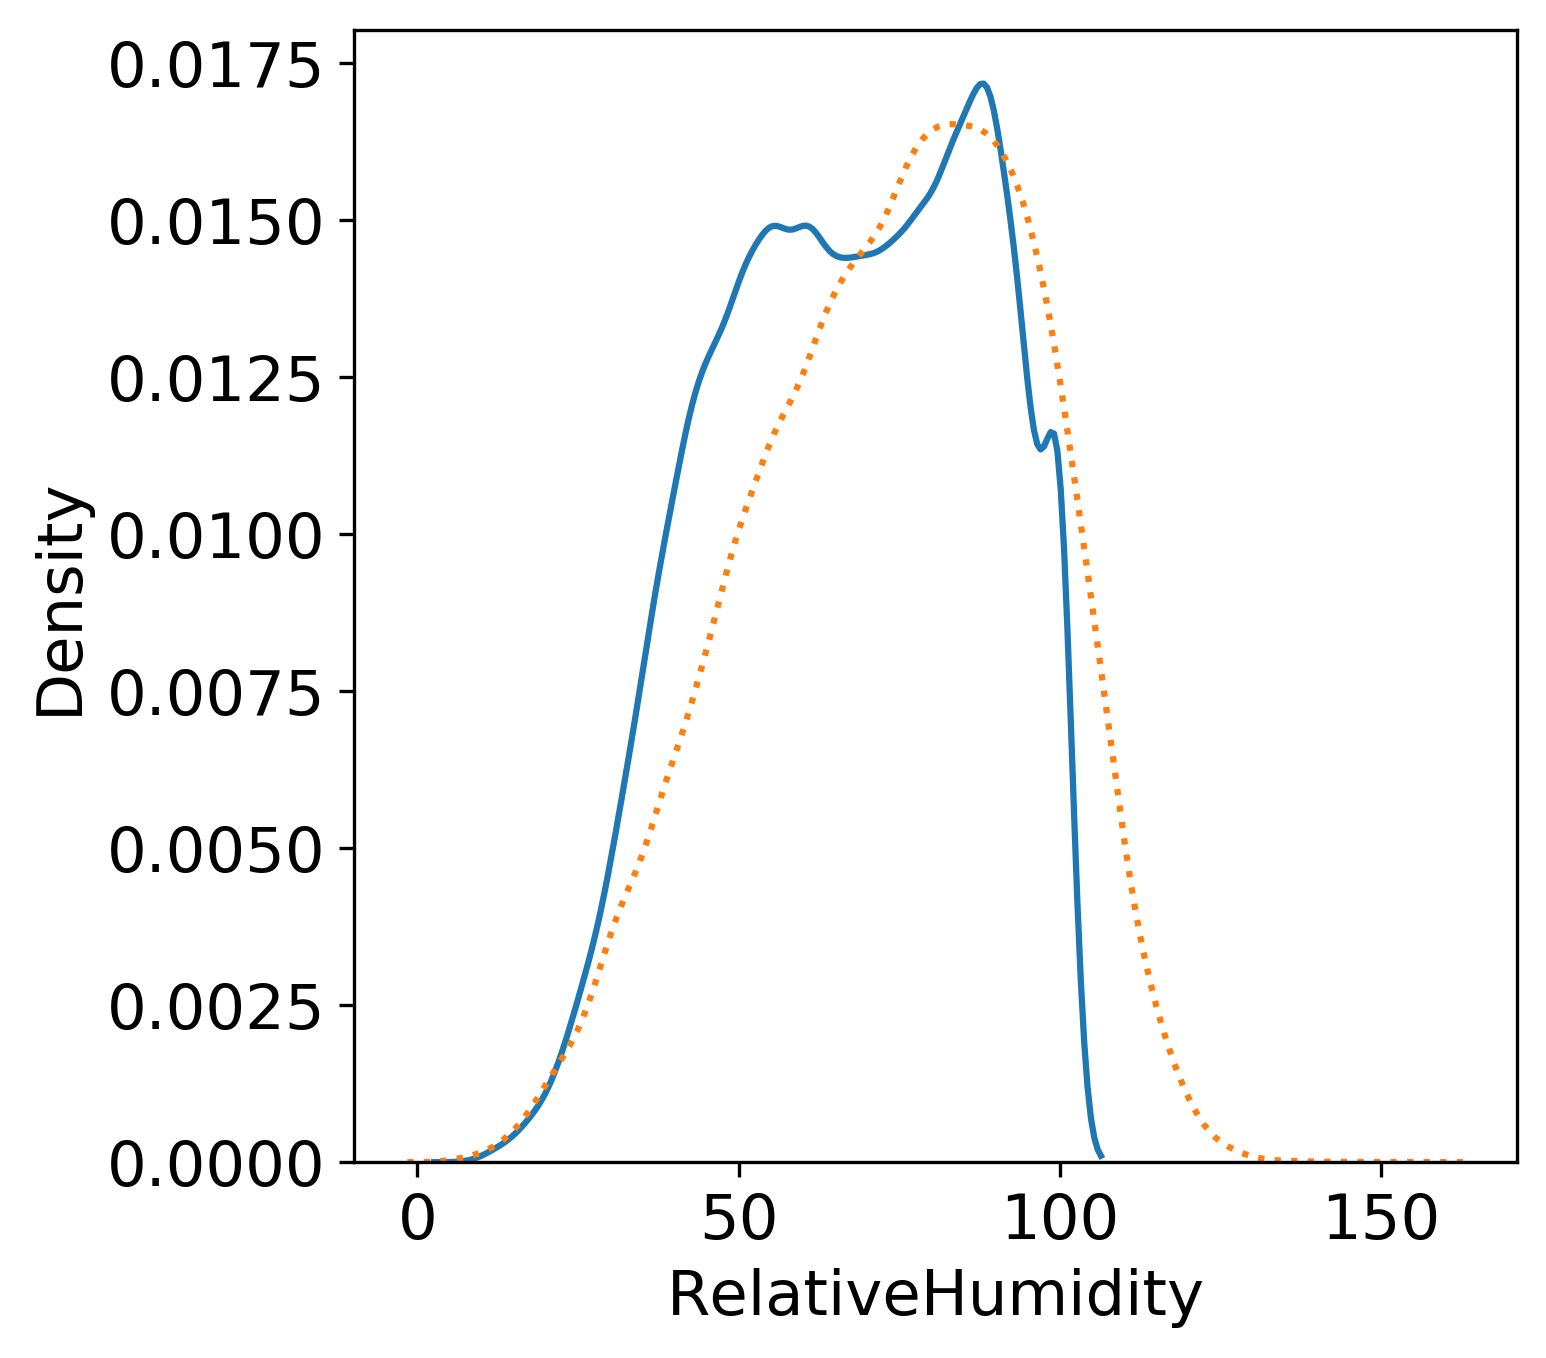

In [7]:
data1=weather1['DRYBULBTEMPF']
data2=weather['DRYBULBTEMPF']
# data3=fake_weather_with_noise['DRYBULBTEMPF']
fig = plt.figure(figsize=(5, 5), dpi=300)
sns.distplot(data2,hist=False, kde=True)
# sns.kdeplot(data3,color="green",ls='-.')  # kde 核密度估计
sns.kdeplot(data1,ls=':')  # kde 核密度估计

# sns.distplot(data1,hist=True, kde=True)

plt.tick_params(labelsize=15)
font2 = {
'weight' : 'normal',
'size'   : 15,
}
plt.xlabel('DRYBULBTEMPF',font2)
plt.ylabel("Density",font2)
plt.show()
# plt.show()


data1=weather1['WindDirection']
data2=weather['WindDirection']
# data3=fake_weather_with_noise['WindDirection']
fig = plt.figure(figsize=(5, 5), dpi=300)

# sns.kdeplot(data3,color="green",ls='-.')  # kde 核密度估计
# hist=False
# plt.hist(data1, bins, normed=True, color="#FF0000", alpha=.9)
# sns.kdeplot(data1,color="pink",ls=':')  # kde 核密度估计
sns.distplot(data2,hist=False, kde=True)
# sns.kdeplot(data3,color="green",ls='-.')  # kde 核密度估计
sns.kdeplot(data1,ls=':')  # kde 核密度估计


# labels = ax.get_xticklabels() + ax.get_yticklabels()
# [label.set_fontname('Times New Roman')]
plt.tick_params(labelsize=15)
font2 = {
'weight' : 'normal',
'size'   : 15,
}
plt.xlabel('WindDirection',font2)
plt.ylabel("Density",font2)
plt.show()

data1=weather1['WETBULBTEMPF']
data2=weather['WETBULBTEMPF']
# data3=fake_weather_with_noise['WETBULBTEMPF']
fig = plt.figure(figsize=(5, 5), dpi=300)

# sns.kdeplot(data3,color="green",ls='-.')  # kde 核密度估计
# plt.hist(data1, bins, normed=True, color="#FF0000", alpha=.9)
# sns.kdeplot(data1,color="pink",ls=':')  # kde 核密度估计
sns.distplot(data2,hist=False, kde=True)
# sns.kdeplot(data3,color="green",ls='-.')  # kde 核密度估计
sns.kdeplot(data1,ls=':')  # kde 核密度估计
plt.tick_params(labelsize=15)
font2 = {
'weight' : 'normal',
'size'   : 15,
}
plt.xlabel('WETBULBTEMPF',font2)
plt.ylabel("Density",font2)
plt.show()


data1=weather1['DewPointTempF']
data2=weather['DewPointTempF'] 
fig = plt.figure(figsize=(5, 5), dpi=300)

sns.distplot(data2,hist=False, kde=True)
sns.kdeplot(data1,ls=':')  # kde 核密度估计
plt.tick_params(labelsize=15)
font2 = {
'weight' : 'normal',
'size'   : 15,
}
plt.xlabel('DewPointTempF',font2)
plt.ylabel("Density",font2)
plt.show()

data1=weather1['WindSpeed']
data2=weather['WindSpeed']
# data3=fake_weather_with_noise['DewPointTempF']
fig = plt.figure(figsize=(5, 5), dpi=300)

# sns.kdeplot(data3,color="green",ls='-.')  # kde 核密度估计
# plt.hist(data1, bins, normed=True, color="#FF0000", alpha=.9)
# sns.kdeplot(data1,color="pink",ls=':')  # kde 核密度估计
sns.distplot(data2,hist=False, kde=True)
# sns.kdeplot(data3,color="green",ls='-.')  # kde 核密度估计
sns.kdeplot(data1,ls=':')  # kde 核密度估计)
plt.tick_params(labelsize=15)
font2 = {
'weight' : 'normal',
'size'   : 15,
}
plt.xlabel('WindSpeed',font2)
plt.ylabel("Density",font2)
plt.show()


data1=weather1['RelativeHumidity']
data2=weather['RelativeHumidity']
# data3=fake_weather_with_noise['DewPointTempF']
fig = plt.figure(figsize=(5, 5), dpi=300)

# sns.kdeplot(data3,color="green",ls='-.')  # kde 核密度估计
# plt.hist(data1, bins, normed=True, color="#FF0000", alpha=.9)
# sns.kdeplot(data1,color="pink",ls=':')  # kde 核密度估计
sns.distplot(data2,hist=False, kde=True)
# sns.kdeplot(data3,color="green",ls='-.')  # kde 核密度估计
sns.kdeplot(data1,ls=':')  # kde 核密度估计

plt.tick_params(labelsize=15)
font2 = {
'weight' : 'normal',
'size'   : 15,
}
plt.xlabel('RelativeHumidity',font2)
plt.ylabel("Density",font2)
plt.show()

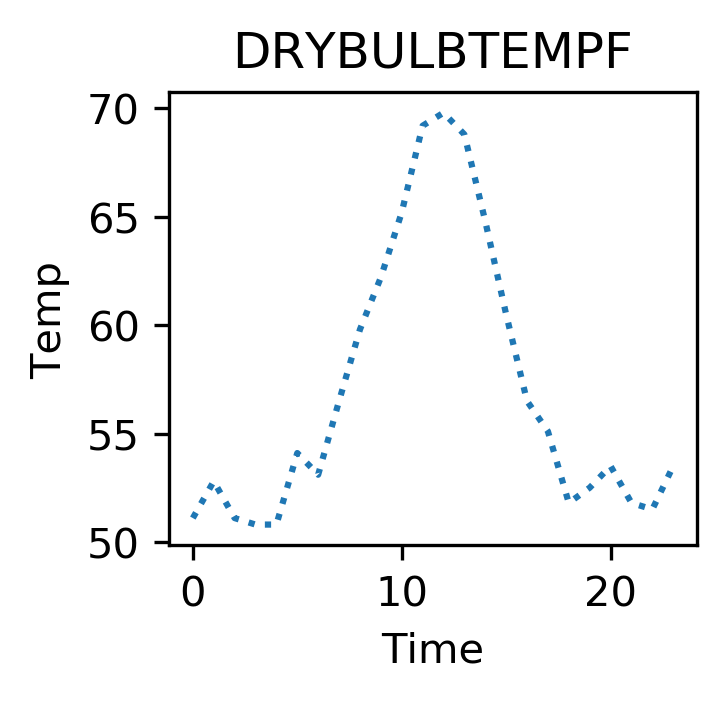

In [32]:
#  , 'RelativeHumidity','WindSpeed','StationPressure'
plot_cols = ['DRYBULBTEMPF']
fig = plt.figure(figsize=(5, 2), dpi=300)
i = 1
for col in plot_cols:
    plt.subplot(len(plot_cols), 2, i)
    plt.plot(weather1[col].iloc[28*24:29*24].values,ls=':')
    plt.title(col)
    i += 1
# plt.subplots_adjust(hspace=0.5)
plt.ylabel('Temp')
plt.xlabel("Time")
# plt.xticks(rotation=30)
plt.show()

In [25]:
import argparse
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import pickle as pkl
import seaborn as sns
import pandas as pd
weather = pd.read_csv('data/jfk_weather_cleaned1.csv')
fake_weather = pd.read_csv('data1/fake4.csv')
fake_weather.head

<bound method NDFrame.head of        DewPointTempF  DRYBULBTEMPF  RelativeHumidity  StationPressure  \
0               54.5          78.7              25.2             29.7   
1               54.5          81.6              24.6             31.1   
2               50.0          82.2              29.5             30.8   
3               53.5          83.8              32.2             31.8   
4               56.1          81.2              31.3             34.1   
...              ...           ...               ...              ...   
79995           55.1          64.0              69.5             31.5   
79996           50.3          66.6              63.4             30.3   
79997           51.9          67.9              59.3             30.1   
79998           52.2          65.9              57.3             29.3   
79999           51.6          63.1              59.9             29.5   

       VISIBILITY  WETBULBTEMPF  WindDirection  WindSpeed  
0           11.70          62.4  

(7.0, 0.0)

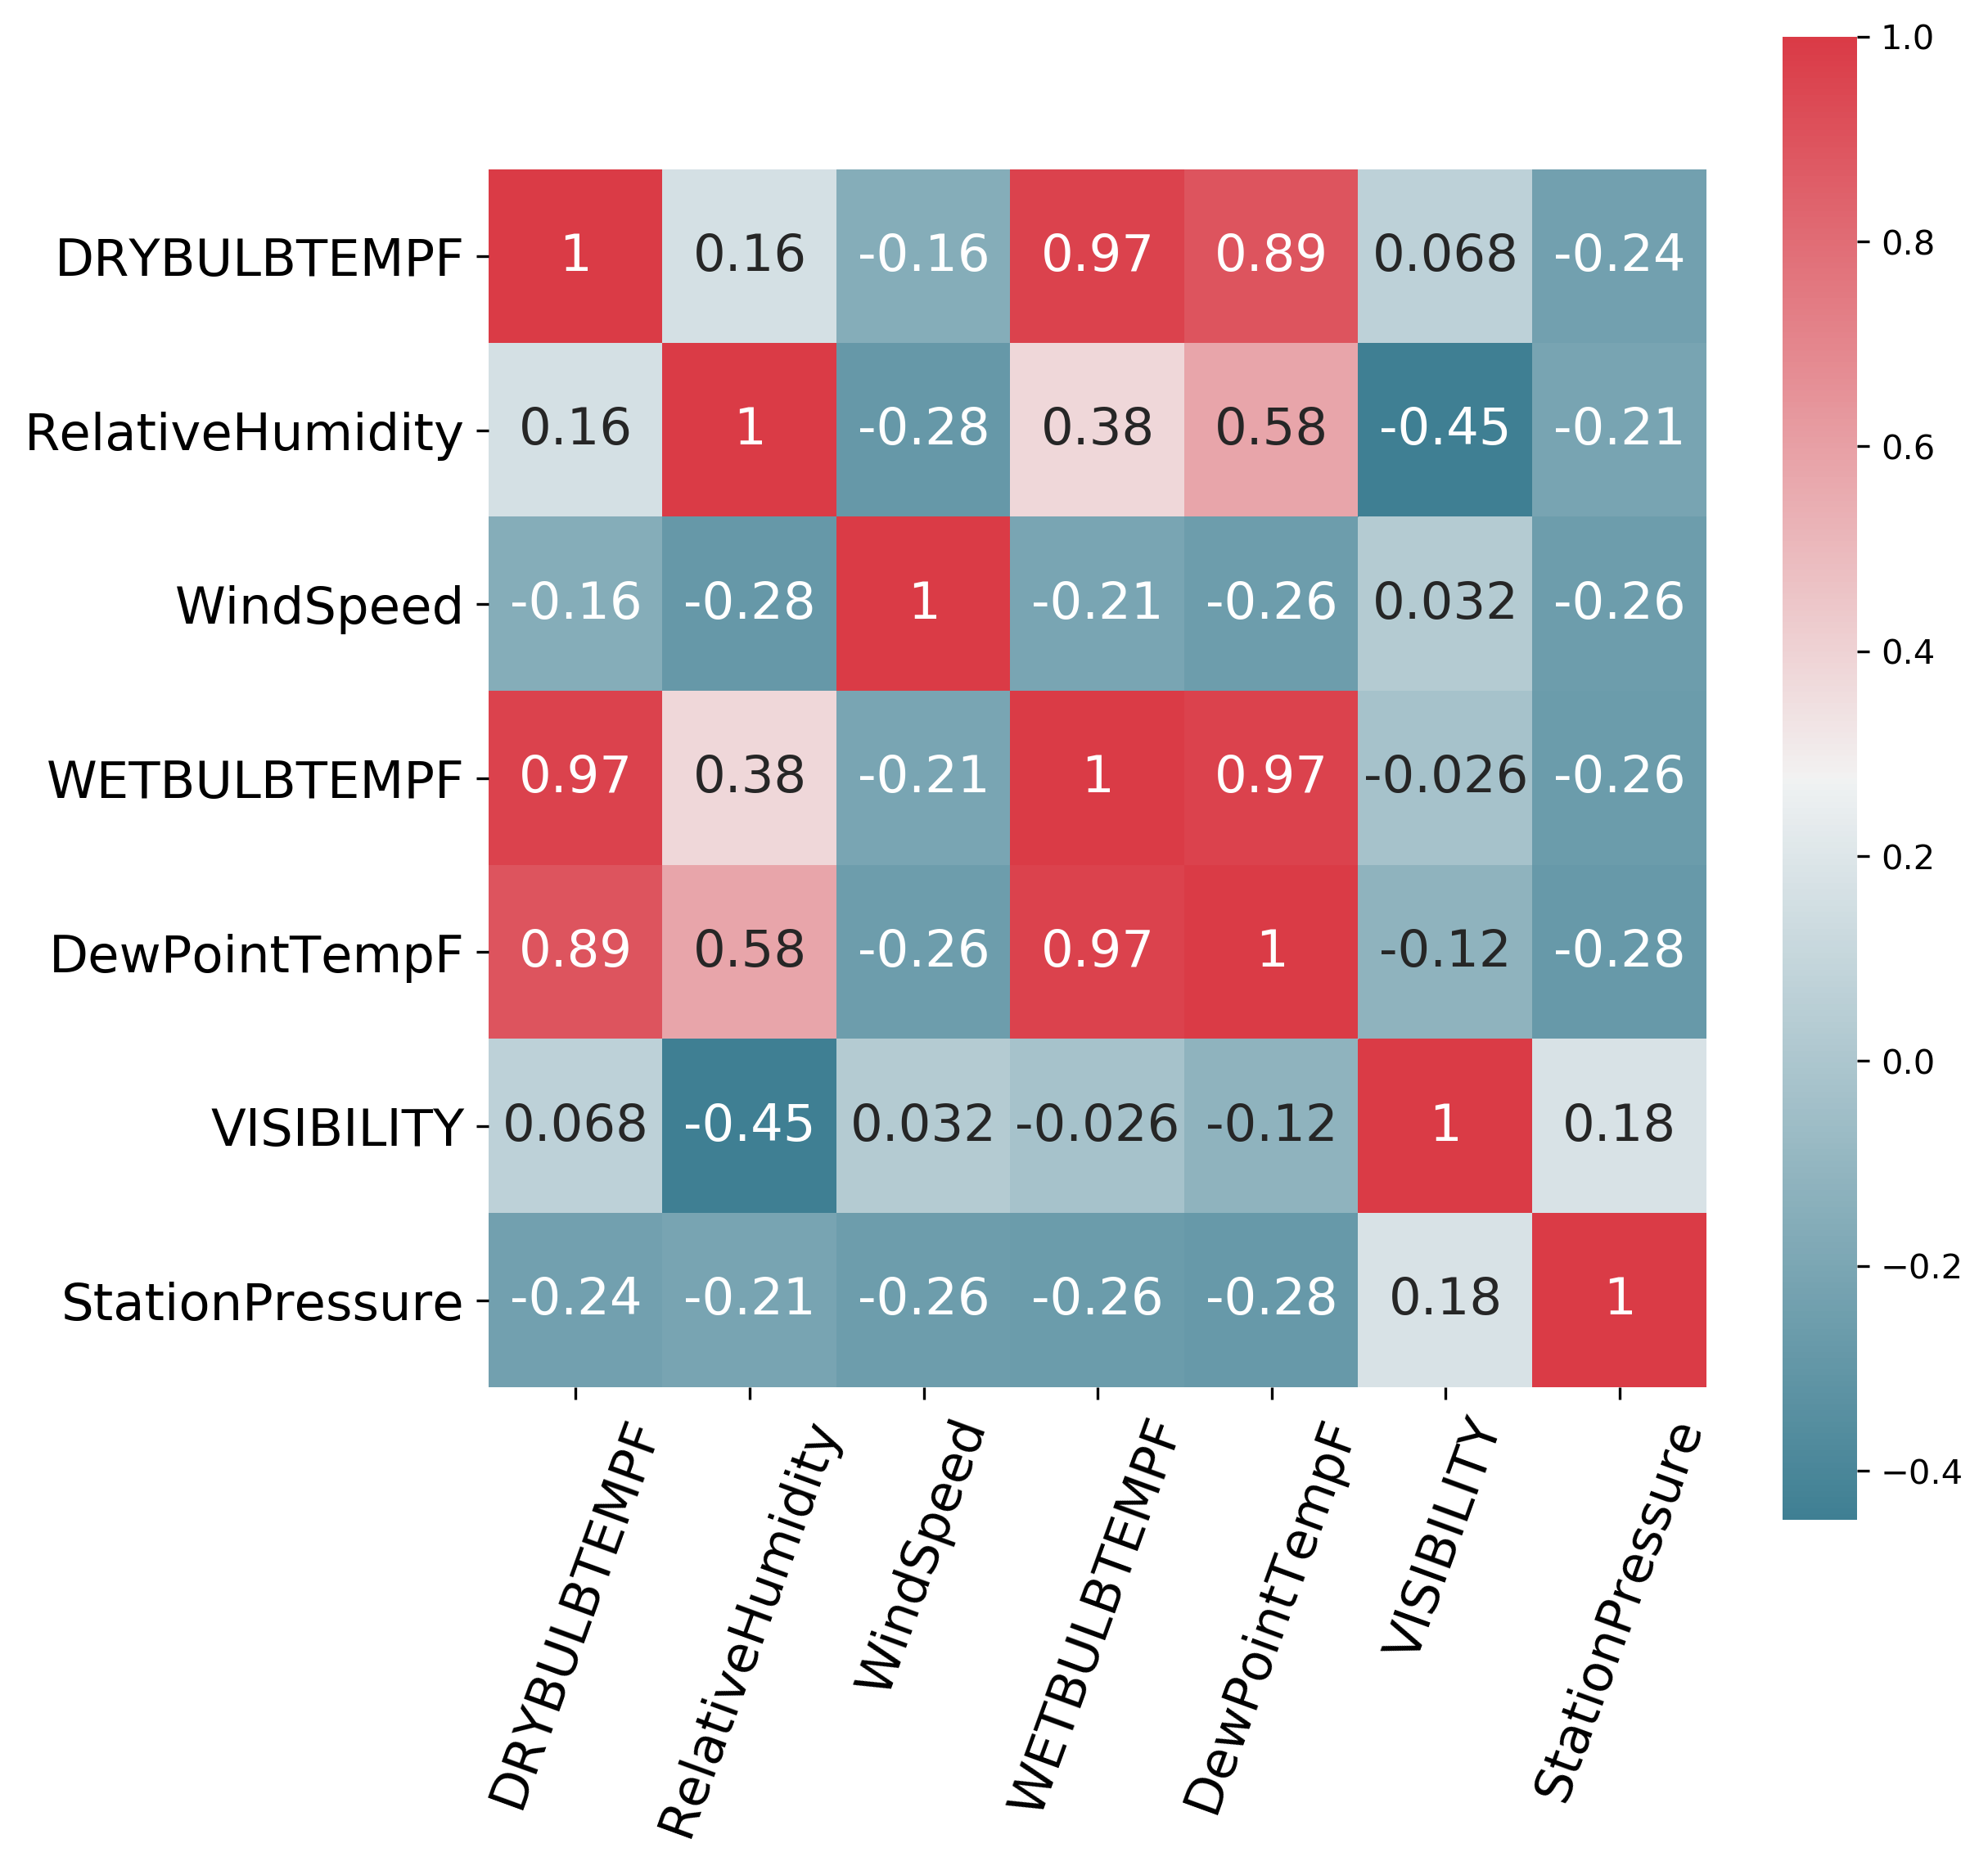

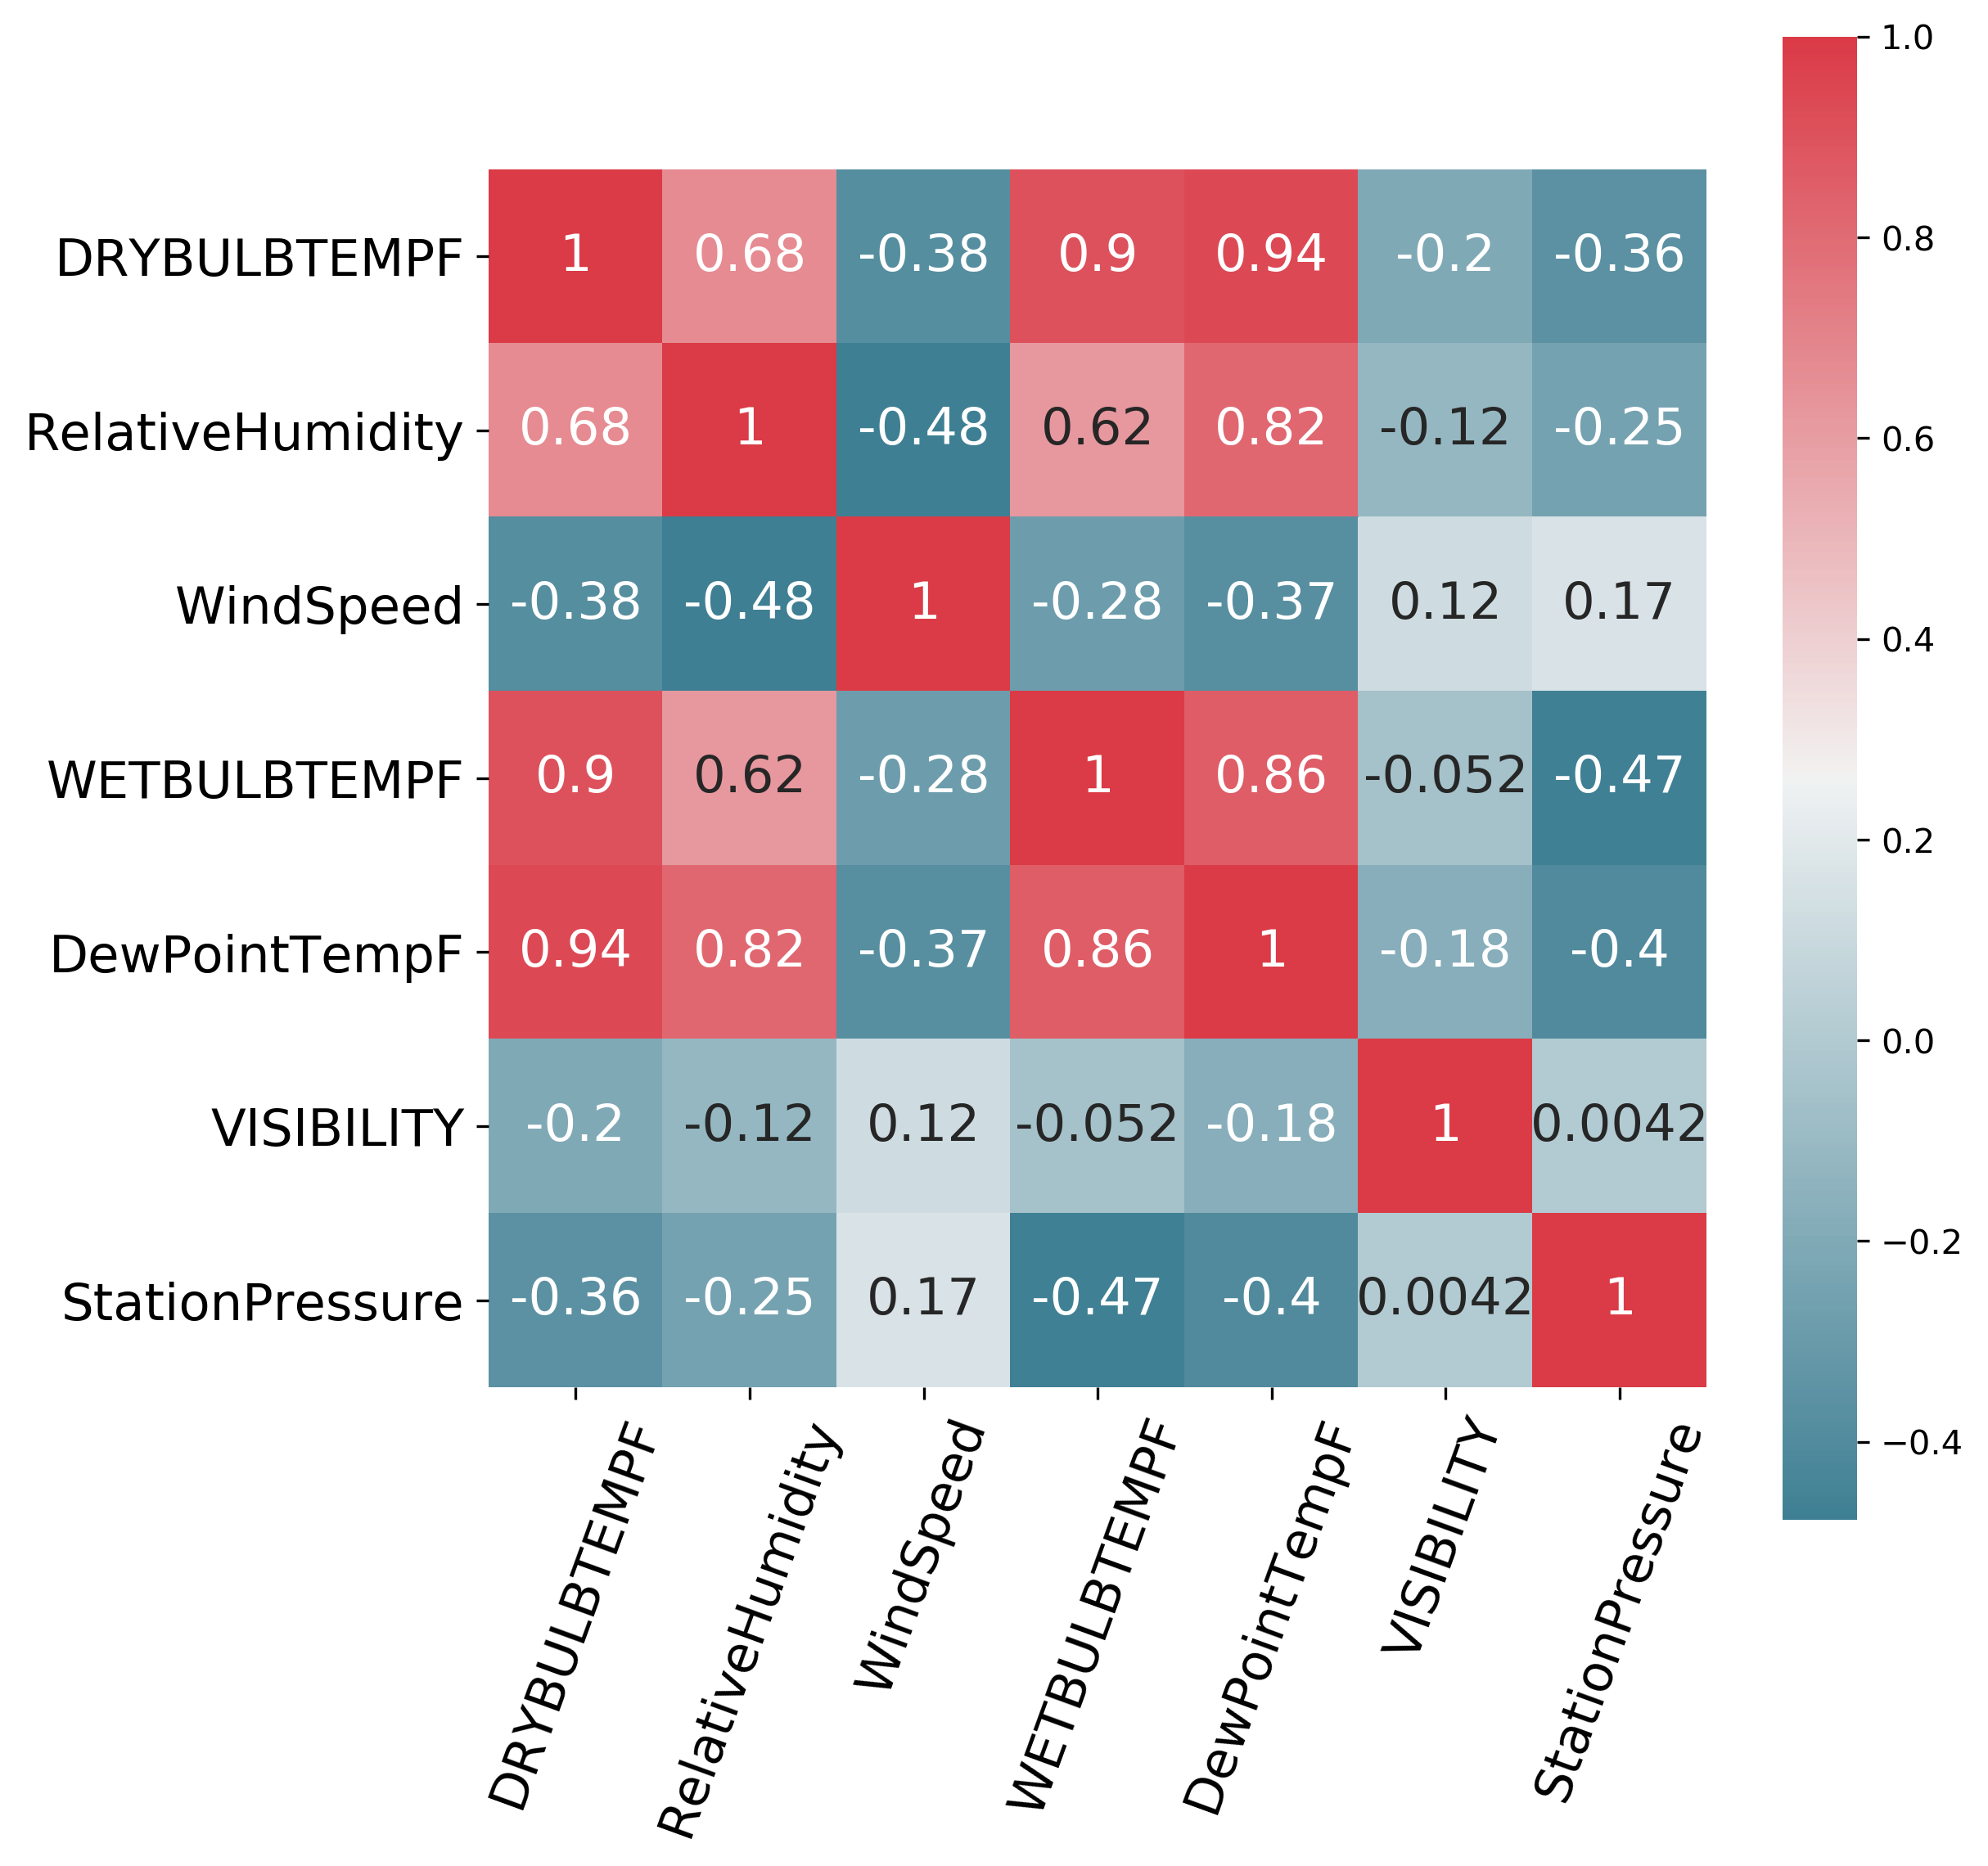

In [19]:
import seaborn as sns
plot_cols = ['DRYBULBTEMPF', 'RelativeHumidity','WindSpeed',"WETBULBTEMPF",'DewPointTempF','VISIBILITY','StationPressure']

f, ax = plt.subplots(figsize=(8,8),dpi=300)
corr = weather[plot_cols].corr()
plt.tick_params(labelsize=15)

#cmap = sns.cubehelix_palette(start = 1.5, rot = 3, gamma=0.8, as_cmap = True)
#sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=cmap, square=True, ax=ax,annot_kws={'size':15})
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax,annot=True,annot_kws={'size':15})
plt.xticks(rotation=70)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

f, ax = plt.subplots(figsize=(8,8),dpi=300)
corr = weather1[plot_cols].corr()
plt.tick_params(labelsize=15)

#cmap = sns.cubehelix_palette(start = 1.5, rot = 3, gamma=0.8, as_cmap = True)
#sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=cmap, square=True, ax=ax,annot_kws={'size':15})
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax,annot=True,annot_kws={'size':15})
plt.xticks(rotation=70)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


# f, ax = plt.subplots(figsize=(8,8),dpi=300)
# corr = fake_weather_with_noise[plot_cols].corr()
# plt.tick_params(labelsize=15)


# sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax,annot=True,annot_kws={'size':15})
# plt.xticks(rotation=60)
# bottom, top = ax.get_ylim()
# ax.set_ylim(bottom + 0.5, top - 0.5)